# UV Vision 1: modèle de caméra et calibration, ENSTA Bretagne
Jeremy Nicola - jeremy.nicola@gmail.com

Avec de vrais morceaux de doc OpenCV et http://www.isir.upmc.fr/UserFiles/File/clady_homepage/EPU/5-3Dcomputervision.pdf dedans

# How are 3D space objects projected on the image 2D plane?
![transforms](imgs/projs.gif)
A 3D point $\mathbf{M}$ with coordinates $(X_w,Y_w,Z_w)$ in the world frame will be imaged at some point $(x,y)$ in the image plane.
* First, $\mathbf{M}$ must be projected in the camera frame as $(X,Y,Z)$.
* Then, it must be projected in the image plane as $(x,y)$
* Then, it must be expressed in pixels as $(u_c,v_c)$
* But because of some uncertainties, additional parameters must be taken into account before projecting on the pixel plane.

To sum up we have 3 transformations:

Pixel "coordinates" <- Camera Coordinates <- World Coordinates

The **camera calibration** consists of estimating those parameters, and will enable us to dermine the relation between the camera's natural units (pixels) and the real world units (meters, millimeters...)

In this lesson, we will explore those 4 steps separately then solve the camera calibration problem with OpenCV.


## From the world to the camera frame: the extrinsec camera parameters
The transformation from the world coordinate's system to the camera's coordinate's system is described by the **extrinsec parameters** $\mathbf{R}$, a rotation matrix, and $\mathbf{T}$ a translation vector.
We have:
$$
\mathbf{M}=\mathbf{R}\cdot\mathbf{M_w}+\mathbf{T}
$$

**Exercice 1** code the rotation matrix that maps a point from the camera coordinate system to the world coordinate system. Euler angles given in radians following the Z->Y->X convention.

In [4]:
from math import cos,sin
import numpy as np

def getRotMat(alpha,beta,gamma):
    # Tip: pre-set temporary variables :
    # c1=cos(alpha)
    # c2=cos(beta)
    #...
    #return np.array([m11,m12,m13,m21,m22,m23,m31,m32,m33]).reshape((3,3))
    c1=cos(alpha)
    c2=cos(beta)
    c3=cos(gamma)
    s1=sin(alpha)
    s2=sin(beta)
    s3=sin(gamma)
    R=np.array([c1*c2,c1*s2*s3-c3*s1,s1*s3+c1*c3*s2,c2*s1,c1*c3+s1*s2*s3,c3*s1*s2-c1*s3,-s2,c2*s3,c2*c3])
    return R.reshape(3,3)

print(getRotMat(0,0,0))

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [-0.  0.  1.]]


In [6]:
print(getRotMat(0,0,0))

# Don't modify me, just run me
%matplotlib inline
from IPython.html.widgets import interact, interactive
from IPython.display import clear_output, display
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

# Generate a cloud of 3D points in the World coordinate system
pts=5*np.random.randn(4,20)+5
colors=np.random.rand(1,20)
pts[3,:]=1

from getFrameToDraw import getFrameToDraw

def showWorldAndCameraFrame(alpha=0,beta=0,gamma=0,t1=0,t2=0,t3=0):
    alpha=np.radians(alpha)
    beta=np.radians(beta)
    gamma=np.radians(gamma)
    MCam2World=np.eye(4,4)
    MCam2World[0:3,0:3]=getRotMat(alpha,beta,gamma)
    MCam2World[0:3,3]=np.array([t1,t2,t3])
    
    MWorld2Cam=np.eye(4,4)
    MWorld2Cam[0:3,0:3]=getRotMat(alpha,beta,gamma).T
    MWorld2Cam[0:3,3]=-np.array([t1,t2,t3])
    
    PCam=np.dot(MWorld2Cam,pts)
    
    fig=plt.figure()
    ax1=fig.add_subplot(121,projection='3d')
    ax1.scatter(pts[0,:],pts[1,:],pts[2,:],c=colors)
    ax1.set_title("World Frame")
    ax1.set_xlim(0,15)
    ax1.set_ylim(0,15)
    ax1.set_zlim(0,15)
    ax1.set_xlabel("X World")
    ax1.set_ylabel("Y World")
    ax1.set_zlabel("Z World")
    ax2=fig.add_subplot(122,projection='3d')
    ax2.scatter(PCam[0,:],PCam[1,:],PCam[2,:],c=colors)
    ax2.set_title("Camera Frame")
    ax2.set_xlim(0,15)
    ax2.set_ylim(0,15)
    ax2.set_zlim(0,15)
    ax2.set_xlabel("x camera")
    ax2.set_ylabel("y camera")
    ax2.set_zlabel("z camera")
    a1,a2,a3=getFrameToDraw(MCam2World)
    ax1.add_artist(a1)
    ax1.add_artist(a2)
    ax1.add_artist(a3)
    a12,a22,a32=getFrameToDraw(MWorld2Cam,color="b")
    ax2.add_artist(a12)
    ax2.add_artist(a22)
    ax2.add_artist(a32)
    plt.draw()
    plt.show()

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [-0.  0.  1.]]


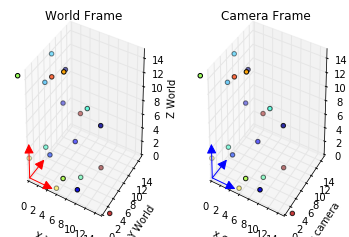

In [7]:
w=interactive(showWorldAndCameraFrame,alpha=(0.,360.),beta=(0.,360.),gamma=(0.,360.),t1=(0,10.),t2=(0,10.),t3=(0,10.))
clear_output(wait=True)
display(w)

## From the image plane to pixel coordinates

In [ ]:
%matplotlib notebook
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)
f=plt.figure()
cap = cv2.VideoCapture(-1)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray)
    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
plt.show()
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()